<a href="https://colab.research.google.com/github/Amdad17/ML-DHP-Predictor-HealthMate-App/blob/main/ML_DHP_Predictor_%26_HealthMate_App.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
diabetes_dataset = pd.read_csv('/content/drive/MyDrive/datasetfinal.csv')

In [ ]:
pd.read_csv?

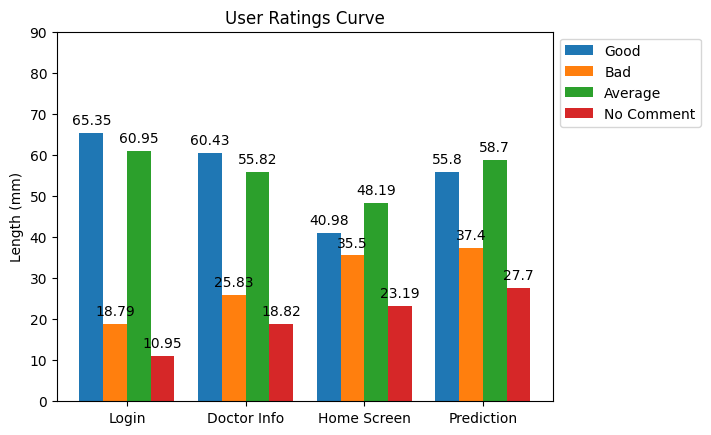

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

species = ("Login", "Doctor Info", "Home Screen", "Prediction")
penguin_means = {
    'Good': (65.35, 60.43, 40.98, 55.8),
    'Bad': (18.79, 25.83, 35.50, 37.4),
    'Average': (60.95, 55.82, 48.19,58.7),
    'No Comment': (10.95, 18.82, 23.19, 27.7),
}

x = np.arange(len(species))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots()

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=4)
    multiplier += 1

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('User Ratings Curve')
ax.set_xticks(x + width*1.5)
ax.set_xticklabels(species)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.set_ylim(0, 90)

plt.show()


In [ ]:
# printing the first 5 rows of the dataset
diabetes_dataset.head(5)
diabetes_dataset.columns

Index(['Age', 'Duration of Diabetes (years)', 'Insuline Usage ',
       'Doctor Visits(Per month)', 'Blood Glucose Monitoring (per day)',
       'Time Spent on Exercise (hours per week)',
       'Time Spent on Meal Planning (hours per day)', 'Direct Costs (Tk)',
       'Indirect Costs (Tk)', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Outcome', 'Hypersention',
       'HbA1c_level'],
      dtype='object')

In [ ]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Age,Duration of Diabetes (years),Doctor Visits(Per month),Blood Glucose Monitoring (per day),Time Spent on Exercise (hours per week),Time Spent on Meal Planning (hours per day),Direct Costs (Tk),Indirect Costs (Tk),Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome,Hypersention,HbA1c_level
count,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.00000,779.000000
mean,33.231065,3.462131,2.503209,2.780488,1.673941,0.831515,4882.798460,840.885751,120.749679,69.274711,20.793325,80.052632,31.924134,0.471516,0.353017,0.06932,5.578691
std,11.691757,4.563974,1.236101,0.824951,0.660277,0.351409,2204.881678,399.526212,31.801202,19.280010,15.993641,114.587653,7.854053,0.329211,0.478215,0.25416,1.120805
min,21.000000,1.000000,0.000000,1.000000,1.000000,0.250000,1000.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,0.000000,0.00000,3.500000
25%,24.000000,1.000000,2.000000,2.000000,1.000000,0.500000,3000.000000,600.000000,99.000000,64.000000,0.000000,0.000000,27.250000,0.245000,0.000000,0.00000,4.800000
50%,29.000000,2.000000,2.000000,3.000000,2.000000,0.750000,4500.000000,800.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.376000,0.000000,0.00000,5.800000
75%,40.500000,4.000000,4.000000,3.000000,2.000000,1.000000,6000.000000,1100.000000,140.000000,80.000000,33.000000,127.500000,36.500000,0.621500,1.000000,0.00000,6.200000
max,81.000000,71.000000,4.000000,5.000000,3.000000,2.000000,10000.000000,1500.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,1.000000,1.00000,9.000000


In [ ]:
# import pandas as pd

# Assuming your dataframe is named 'df' and the column to be modified is named 'column_name'
diabetes_dataset['Insuline Usage '] = diabetes_dataset['Insuline Usage '].str.strip()
print(diabetes_dataset['Insuline Usage '])
print(diabetes_dataset['Insuline Usage '].unique())


0       No
1      Yes
2       No
3       No
4      Yes
      ... 
774    Yes
775     No
776    Yes
777     No
778    Yes
Name: Insuline Usage , Length: 779, dtype: object
['No' 'Yes']


In [ ]:
diabetes_dataset['Insuline Usage '] = diabetes_dataset['Insuline Usage '].replace({'Yes': 1, 'No': 0})

In [ ]:
print(diabetes_dataset['Insuline Usage '])
print(diabetes_dataset['Insuline Usage '].unique())

0      0
1      1
2      0
3      0
4      1
      ..
774    1
775    0
776    1
777    0
778    1
Name: Insuline Usage , Length: 779, dtype: int64
[0 1]


In [ ]:
diabetes_dataset['Outcome'].value_counts()

0    504
1    275
Name: Outcome, dtype: int64

In [ ]:
diabetes_dataset.groupby('Outcome').mean()

,Age,Duration of Diabetes (years),Insuline Usage,Doctor Visits(Per month),Blood Glucose Monitoring (per day),Time Spent on Exercise (hours per week),Time Spent on Meal Planning (hours per day),Direct Costs (Tk),Indirect Costs (Tk),Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Hypersention,HbA1c_level
Outcome,,,,,,,,,,,,,,,,,
0,31.244048,3.180556,0.515873,2.472222,2.771825,1.654762,0.832341,4847.023810,842.757937,110.140873,68.259921,19.825397,69.876984,30.297024,0.429377,0.075397,5.594444
1,36.872727,3.978182,0.465455,2.560000,2.796364,1.709091,0.830000,4948.363636,837.454545,140.192727,71.134545,22.567273,98.701818,34.906182,0.548745,0.058182,5.549818


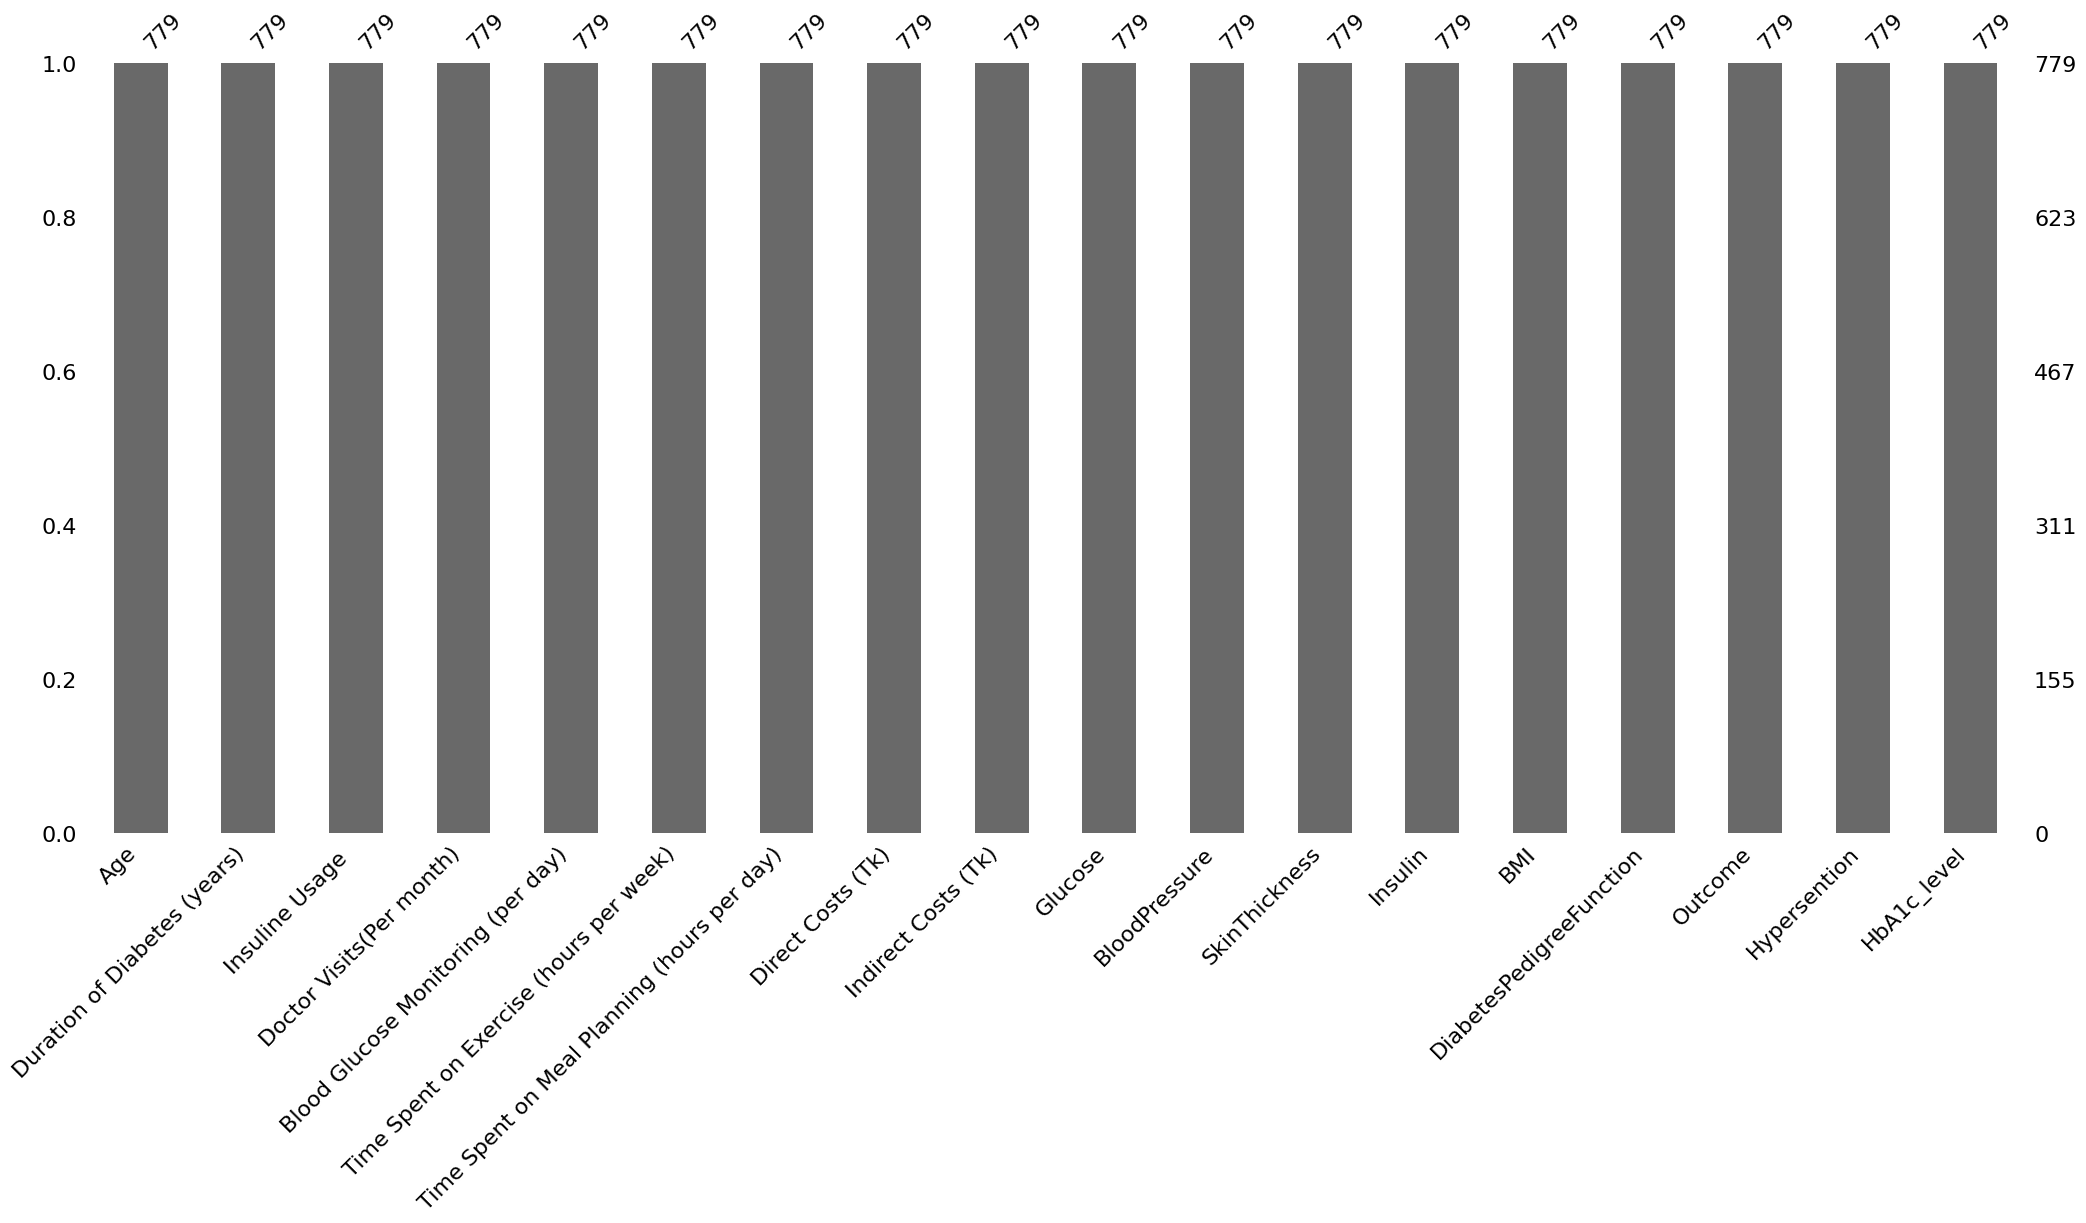

In [ ]:
import missingno as msno
msno.bar(diabetes_dataset);

In [ ]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [ ]:
print(X)

     Age  Duration of Diabetes (years)  Insuline Usage   \
0     50                             5                0   
1     31                             3                1   
2     32                             2                0   
3     21                             4                0   
4     33                             7                1   
..   ...                           ...              ...   
774   35                             5                1   
775   32                             2                0   
776   30                             1                1   
777   31                             1                0   
778   33                             2                1   

     Doctor Visits(Per month)  Blood Glucose Monitoring (per day)  \
0                           2                                   3   
1                           4                                   5   
2                           1                                   2   
3              

In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
774    0
775    1
776    1
777    1
778    1
Name: Outcome, Length: 779, dtype: int64


In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
standardized_data = scaler.transform(X)

In [ ]:
print(standardized_data)

[[ 1.4351742   0.33717479 -0.9961563  ...  0.4725959  -0.2729153
   0.91181401]
 [-0.19094639 -0.1013213   1.00385854 ... -0.3663104  -0.2729153
   0.91181401]
 [-0.1053611  -0.32056935 -0.9961563  ...  0.6093741  -0.2729153
   0.1083037 ]
 ...
 [-0.27653169 -0.5398174   1.00385854 ...  0.32669915 -0.2729153
   0.37614047]
 [-0.19094639 -0.5398174  -0.9961563  ... -0.35415234 -0.2729153
  -1.85583261]
 [-0.01977581 -0.32056935  1.00385854 ... -0.11707012 -0.2729153
  -1.85583261]]


In [ ]:
X = standardized_data
Y = diabetes_dataset['Outcome']

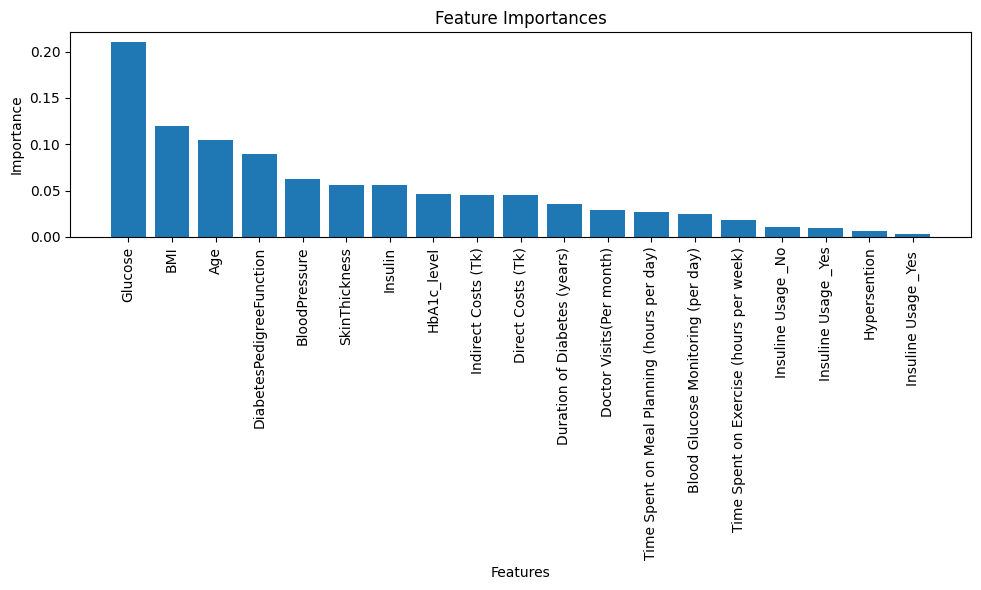

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

# Read the dataset from a CSV file
diabetes_dataset = pd.read_csv('/content/drive/MyDrive/datasetfinal.csv')

# Drop the target variable for feature analysis
X = diabetes_dataset.drop(['Outcome'], axis=1)  # Adjust the column names as per your dataset
y = diabetes_dataset['Outcome']

# Apply one-hot encoding to handle categorical variables
X_encoded = pd.get_dummies(X)

# Create an instance of the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Fit the classifier to the encoded data
rf_classifier.fit(X_encoded, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a dataframe to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
sorted_features = feature_importance_df.sort_values('Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(sorted_features['Feature'], sorted_features['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()



In [ ]:

X = standardized_data
Y = diabetes_dataset['Outcome']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=70)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = RandomForestClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
print("Classification Report:")
print(classification_report(Y_test, predictions))
print("Accuracy:", accuracy_score(Y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        49
           1       1.00      0.55      0.71        29

    accuracy                           0.83        78
   macro avg       0.90      0.78      0.80        78
weighted avg       0.87      0.83      0.82        78

Accuracy: 0.8333333333333334


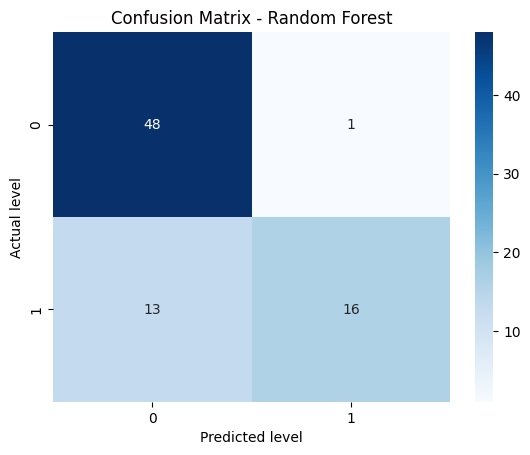

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define features and target variable
X = standardized_data
Y = diabetes_dataset['Outcome']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=70)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = RandomForestClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(Y_test, predictions)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted level")
plt.ylabel("Actual level")
plt.title("Confusion Matrix - Random Forest")
plt.show()


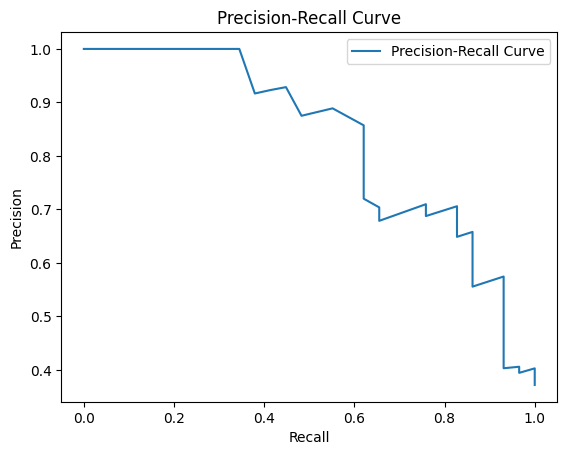

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Define features and target variable
X = standardized_data
Y = diabetes_dataset['Outcome']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=70)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = RandomForestClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
# Get predicted probabilities
y_scores = model.predict_proba(X_test)[:, 1]

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(Y_test, y_scores)

# Plot the Precision-Recall curve
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle


In [ ]:
diabetes_dataset = pd.read_csv('/content/drive/MyDrive/datasetfinal.csv')
X = diabetes_dataset.iloc[:, :-1],
y = diabetes_dataset.iloc[:,1],
print(diabetes_dataset.head)

<bound method NDFrame.head of      Age  Duration of Diabetes (years) Insuline Usage   \
0     50                             5              No   
1     31                             3             Yes   
2     32                             2              No   
3     21                             4              No   
4     33                             7             Yes   
..   ...                           ...             ...   
774   35                             5            Yes    
775   32                             2              No   
776   30                             1             Yes   
777   31                             1              No   
778   33                             2             Yes   

     Doctor Visits(Per month)  Blood Glucose Monitoring (per day)  \
0                           2                                   3   
1                           4                                   5   
2                           1                                   2 

In [ ]:
filename='diabetes_pred_model'
pickle.dump(model,open(filename,'wb'))

In [ ]:
loaded_model = pickle.load(open(filename,'rb'))
loaded_model.predict(X_test)


array([1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [ ]:
X = standardized_data
Y = diabetes_dataset['Outcome']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = SVC()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
print("Classification Report:")
print(classification_report(Y_test, predictions))
print("Accuracy:", accuracy_score(Y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.74      0.76        50
           1       0.58      0.64      0.61        28

    accuracy                           0.71        78
   macro avg       0.68      0.69      0.69        78
weighted avg       0.71      0.71      0.71        78

Accuracy: 0.7051282051282052


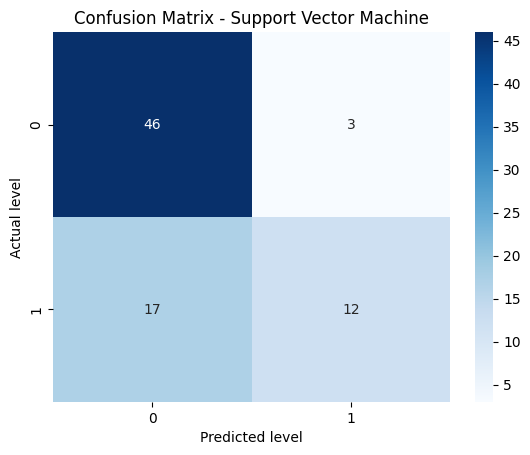

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define features and target variable
X = standardized_data
Y = diabetes_dataset['Outcome']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=70)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = SVC()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(Y_test, predictions)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted level")
plt.ylabel("Actual level")
plt.title("Confusion Matrix - Support Vector Machine")
plt.show()


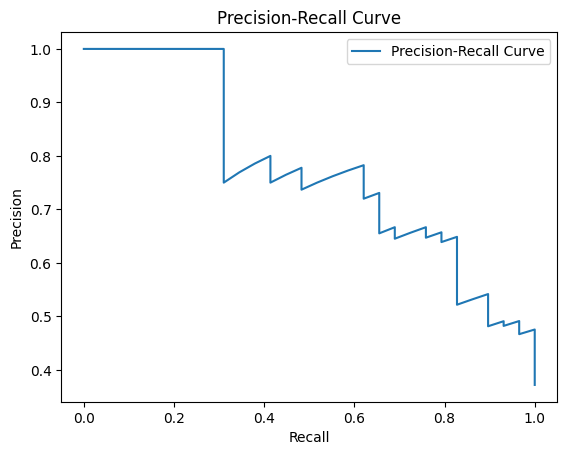

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Define features and target variable
X = standardized_data
Y = diabetes_dataset['Outcome']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=70)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = SVC()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
# Get predicted probabilities
y_scores = model.decision_function(X_test)

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(Y_test, y_scores)

# Plot the Precision-Recall curve
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


In [ ]:
X = standardized_data
Y = diabetes_dataset['Outcome']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=80)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
print("Classification Report:")
print(classification_report(Y_test, predictions))
print("Accuracy:", accuracy_score(Y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.85      0.80        48
           1       0.71      0.57      0.63        30

    accuracy                           0.74        78
   macro avg       0.73      0.71      0.72        78
weighted avg       0.74      0.74      0.74        78

Accuracy: 0.7435897435897436


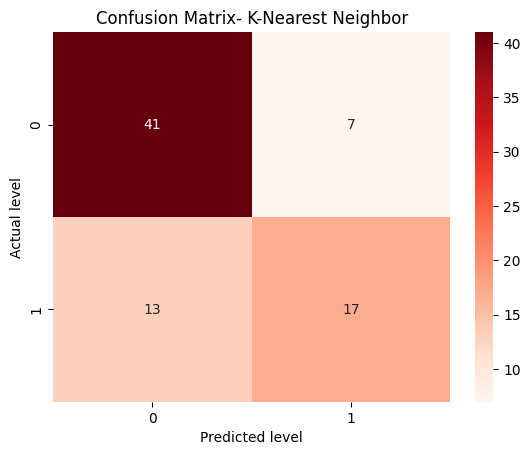

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define features and target variable
X = standardized_data
Y = diabetes_dataset['Outcome']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=80)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(Y_test, predictions)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.xlabel("Predicted level")
plt.ylabel("Actual level")
plt.title("Confusion Matrix- K-Nearest Neighbor")
plt.show()


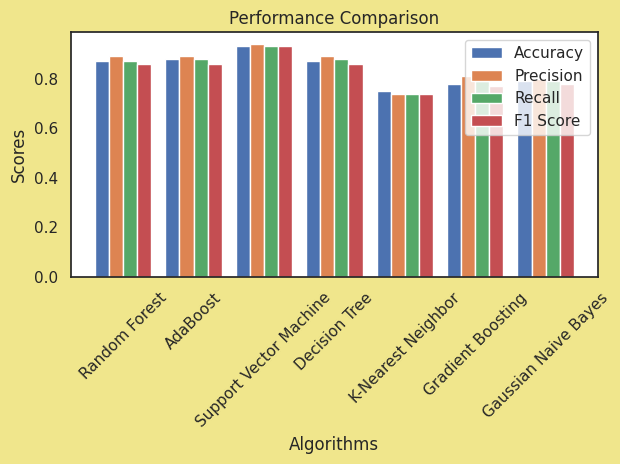

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# List of model names
model_names = ['Random Forest', 'AdaBoost', 'Support Vector Machine', 'Decision Tree', 'K-Nearest Neighbor', 'Gradient Boosting', 'Gaussian Naive Bayes']

# Evaluation metrics for each model
accuracy_scores = [0.87, 0.88, 0.93, 0.87, 0.75, 0.78, 0.79]
precision_scores = [0.89, 0.89, 0.94, 0.89, 0.74, 0.81, 0.80]
recall_scores = [0.87, 0.88, 0.93, 0.88, 0.74, 0.79, 0.79]
f1_scores = [0.86, 0.86, 0.93, 0.86, 0.74, 0.77, 0.78]

# Set the width of the bars
bar_width = 0.2

# Set the position of the bars on the x-axis
x = np.arange(len(model_names))

# Plotting the bars for accuracy scores
plt.bar(x, accuracy_scores, width=bar_width, label='Accuracy')
# Plotting the bars for precision scores
plt.bar(x + bar_width, precision_scores, width=bar_width, label='Precision')
# Plotting the bars for recall scores
plt.bar(x + 2 * bar_width, recall_scores, width=bar_width, label='Recall')
# Plotting the bars for F1 scores
plt.bar(x + 3 * bar_width, f1_scores, width=bar_width, label='F1 Score')

# Set the labels, title, and legend
plt.xlabel('Algorithms')
plt.ylabel('Scores')
plt.title('Performance Comparison')
plt.xticks(x + 1.5 * bar_width, model_names, rotation=45)
plt.legend()

# Set the background color of the figure
fig = plt.gcf()
fig.set_facecolor('khaki')

# Show the graph
plt.tight_layout()
plt.show()


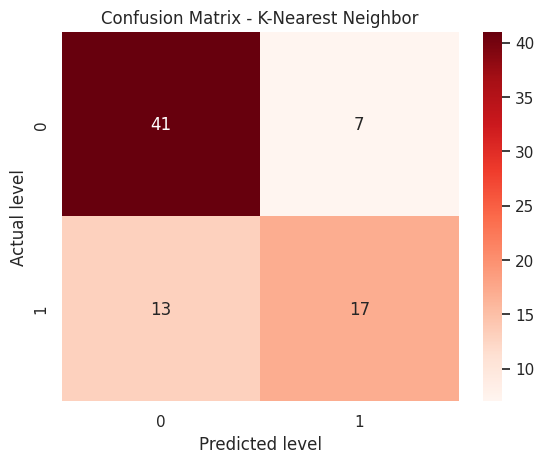

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define features and target variable
X = standardized_data
Y = diabetes_dataset['Outcome']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=80)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(Y_test, predictions)

# Set the background color of the plot
sns.set(style=("darkgrid"))

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.xlabel("Predicted level")
plt.ylabel("Actual level")
plt.title("Confusion Matrix - K-Nearest Neighbor")
plt.show()


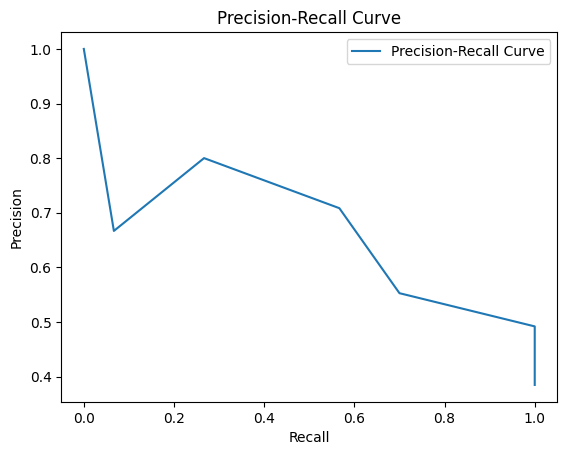

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Define features and target variable
X = standardized_data
Y = diabetes_dataset['Outcome']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=80)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
# Get predicted probabilities
y_scores = model.predict_proba(X_test)[:, 1]

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(Y_test, y_scores)

# Plot the Precision-Recall curve
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


In [ ]:

X = standardized_data
Y = diabetes_dataset['Outcome']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=60)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
print("Classification Report:")
print(classification_report(Y_test, predictions))
print("Accuracy:", accuracy_score(Y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        50
           1       0.64      0.64      0.64        28

    accuracy                           0.74        78
   macro avg       0.72      0.72      0.72        78
weighted avg       0.74      0.74      0.74        78

Accuracy: 0.7435897435897436


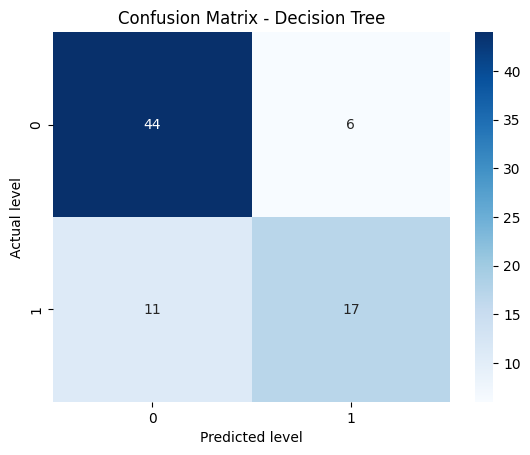

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define features and target variable
X = standardized_data
Y = diabetes_dataset['Outcome']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=60)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(Y_test, predictions)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted level")
plt.ylabel("Actual level")
plt.title("Confusion Matrix - Decision Tree")
plt.show()


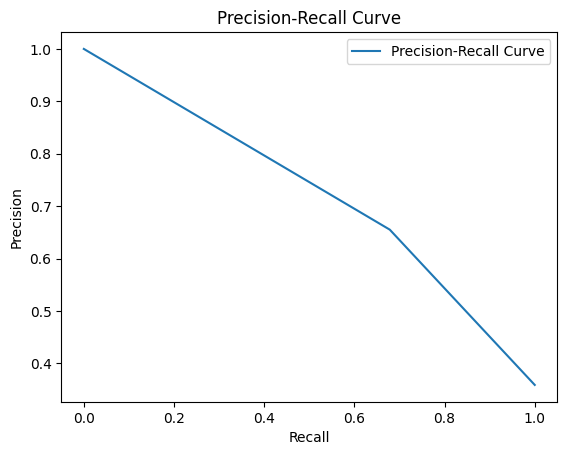

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Define features and target variable
X = standardized_data
Y = diabetes_dataset['Outcome']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=60)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

# Get predicted probabilities
y_scores = model.predict_proba(X_test)[:, 1]

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(Y_test, y_scores)

# Plot the Precision-Recall curve
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


In [ ]:
X = standardized_data
Y = diabetes_dataset['Outcome']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=70)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = AdaBoostClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
print("Classification Report:")
print(classification_report(Y_test, predictions))
print("Accuracy:", accuracy_score(Y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.94      0.85        49
           1       0.84      0.55      0.67        29

    accuracy                           0.79        78
   macro avg       0.81      0.75      0.76        78
weighted avg       0.80      0.79      0.78        78

Accuracy: 0.7948717948717948


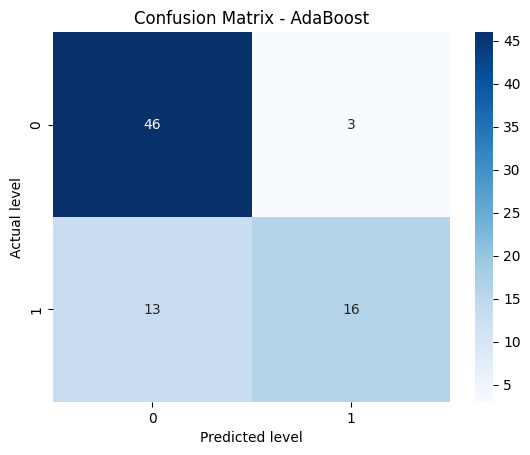

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define features and target variable
X = standardized_data
Y = diabetes_dataset['Outcome']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=70)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = AdaBoostClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(Y_test, predictions)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted level")
plt.ylabel("Actual level")
plt.title("Confusion Matrix - AdaBoost")
plt.show()


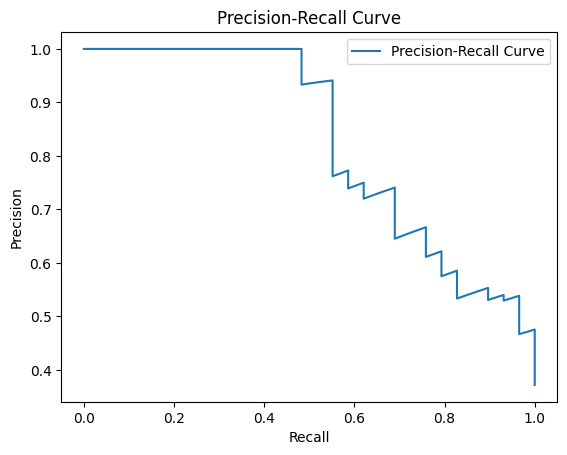

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Define features and target variable
X = standardized_data
Y = diabetes_dataset['Outcome']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=70)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = AdaBoostClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

# Get predicted probabilities
y_scores = model.predict_proba(X_test)[:, 1]

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(Y_test, y_scores)

# Plot the Precision-Recall curve
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


In [ ]:
X = standardized_data
Y = diabetes_dataset['Outcome']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=70)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = GradientBoostingClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
print("Classification Report:")
print(classification_report(Y_test, predictions))
print("Accuracy:", accuracy_score(Y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.95      0.84        94
           1       0.87      0.53      0.66        62

    accuracy                           0.78       156
   macro avg       0.81      0.74      0.75       156
weighted avg       0.80      0.78      0.77       156

Accuracy: 0.782051282051282


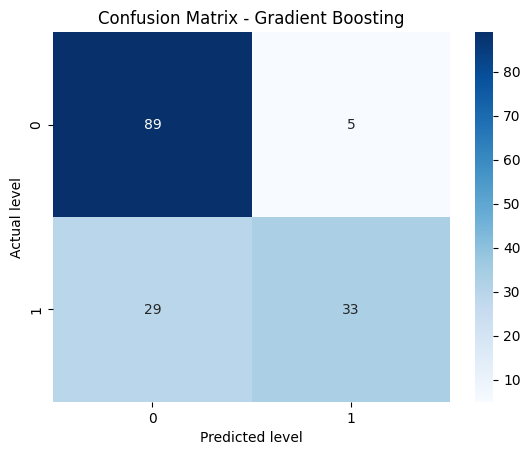

In [ ]:

X = standardized_data
Y = diabetes_dataset['Outcome']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=70)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = GradientBoostingClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(Y_test, predictions)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted level")
plt.ylabel("Actual level")
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()


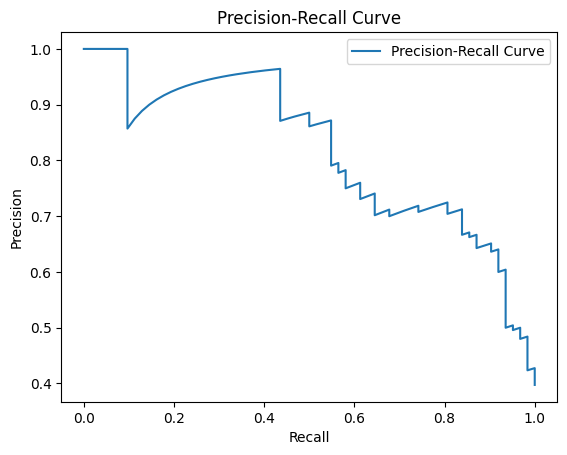

In [ ]:

X = standardized_data
Y = diabetes_dataset['Outcome']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=70)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = GradientBoostingClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

# Get predicted probabilities
y_scores = model.predict_proba(X_test)[:, 1]

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(Y_test, y_scores)

# Plot the Precision-Recall curve
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


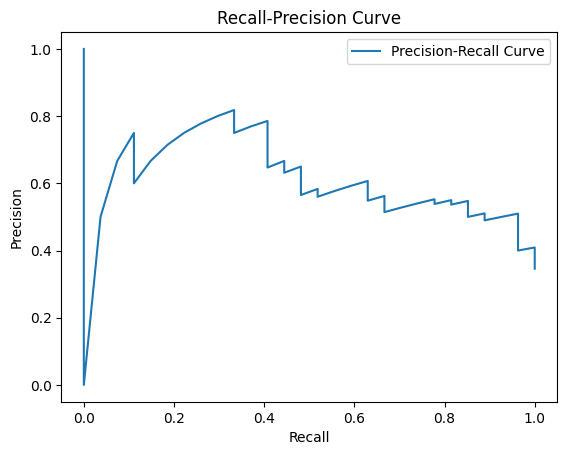

In [ ]:

X = standardized_data
Y = diabetes_dataset['Outcome']
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=93)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the model
model = GradientBoostingClassifier()
# Fit the model on the training data
model.fit(X_train, Y_train)

# Make predictions on the test data
predictions = model.predict(X_test)
# Get predicted probabilities
y_scores = model.predict_proba(X_test)[:, 1]

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(Y_test, y_scores)

# Plot the recall-precision curve
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Recall-Precision Curve')
plt.legend()
plt.show()


In [ ]:
X = standardized_data
Y = diabetes_dataset['Outcome']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=70)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = GaussianNB()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
print("Classification Report:")
print(classification_report(Y_test, predictions))
print("Accuracy:", accuracy_score(Y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.94      0.85        49
           1       0.84      0.55      0.67        29

    accuracy                           0.79        78
   macro avg       0.81      0.75      0.76        78
weighted avg       0.80      0.79      0.78        78

Accuracy: 0.7948717948717948


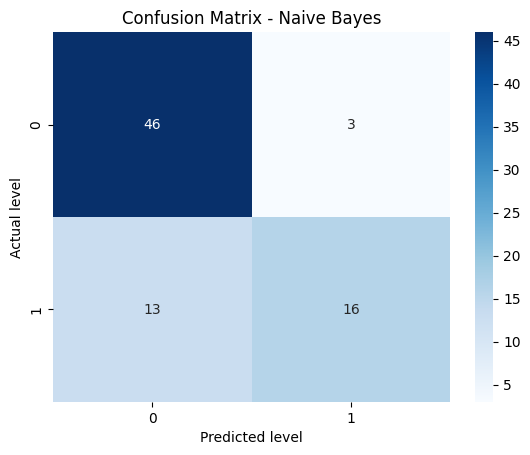

In [ ]:

X = standardized_data
Y = diabetes_dataset['Outcome']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=70)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = GaussianNB()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(Y_test, predictions)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted level")
plt.ylabel("Actual level")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()


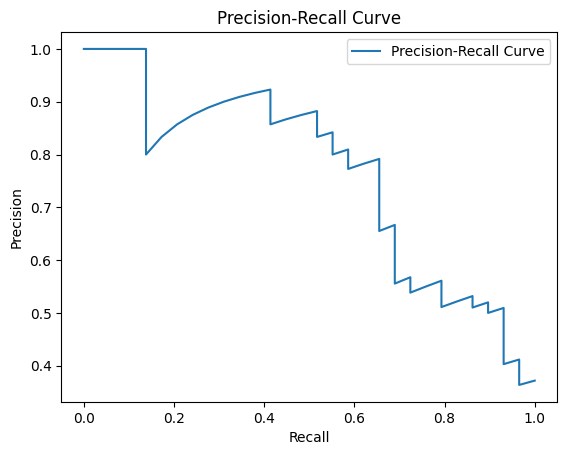

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Define features and target variable
X = standardized_data
Y = diabetes_dataset['Outcome']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=70)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = GaussianNB()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

# Get predicted probabilities
y_scores = model.predict_proba(X_test)[:, 1]

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(Y_test, y_scores)

# Plot the Precision-Recall curve
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


In [ ]:
classifier = svm.SVC(kernel='linear')
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [ ]:
input_data = (50,5,1,2,3,2,1,1000,200,166,72,19,175,25.8,0.248,1,6.6)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not  diabetic and hypertensive')
else:
  print('The person is  diabetic and hypertensive')

[[4.96563372e+01 4.84838219e+00 9.94715972e-01 1.98466842e+00
  3.05896321e+00 1.96661281e+00 9.58804006e-01 1.00758745e+03
  2.01627127e+02 1.67673084e+02 7.18250198e+01 1.89703145e+01
  1.77899204e+02 2.55487967e+01 2.56760486e-01 9.79096738e-01
  6.48097154e+00]]
[1]
The person is  diabetic and hypertensive


In [ ]:
import pickle

# Save the code as a pickle file
with open('model.pickle', 'wb') as f:
    pickle.dump((input_data, input_data_as_numpy_array, input_data_reshaped, std_data, prediction), f)


In [ ]:
import pickle

# Load the code from the pickle file
with open('model.pickle', 'rb') as f:
    input_data, input_data_as_numpy_array, input_data_reshaped, std_data, prediction = pickle.load(f)


In [ ]:
import pandas as pd

# Read the dataset from a CSV file
diabetes_dataset = pd.read_csv('/content/drive/MyDrive/datasetfinal.csv')

# Filter dataset for diabetes patients
diabetes_dataset1 = diabetes_dataset[diabetes_dataset['DiabetesPedigreeFunction'] == 0.383]

# Calculate diabetes cost burden metrics
diabetes_direct_costs = diabetes_dataset1['Direct Costs (Tk)'].sum()
diabetes_indirect_costs = diabetes_dataset1['Indirect Costs (Tk)'].sum()
diabetes_total_cost_burden = diabetes_direct_costs + diabetes_indirect_costs

# Calculate diabetes time burden metrics
diabetes_doctor_visits_time = diabetes_dataset['Doctor Visits(Per month)'].sum()
diabetes_blood_glucose_monitoring_time = diabetes_dataset['Blood Glucose Monitoring (per day)'].sum()
diabetes_exercise_time = diabetes_dataset['Time Spent on Exercise (hours per week)'].sum()
diabetes_meal_planning_time = diabetes_dataset['Time Spent on Meal Planning (hours per day)'].sum()
diabetes_total_time_burden = (
    diabetes_doctor_visits_time + diabetes_blood_glucose_monitoring_time +
    diabetes_exercise_time + diabetes_meal_planning_time
)

# Filter dataset for hypertensive patients
hypertension_dataset = diabetes_dataset[diabetes_dataset['HbA1c_level'] == 2.2]

# Calculate hypertension cost burden metrics
hypertension_direct_costs = hypertension_dataset['Direct Costs (Tk)'].sum()
hypertension_indirect_costs = hypertension_dataset['Indirect Costs (Tk)'].sum()
hypertension_total_cost_burden = hypertension_direct_costs + hypertension_indirect_costs

# Calculate hypertension time burden metrics
hypertension_doctor_visits_time = hypertension_dataset['Doctor Visits(Per month)'].sum()
hypertension_blood_glucose_monitoring_time = hypertension_dataset['Blood Glucose Monitoring (per day)'].sum()
hypertension_exercise_time = hypertension_dataset['Time Spent on Exercise (hours per week)'].sum()
hypertension_meal_planning_time = hypertension_dataset['Time Spent on Meal Planning (hours per day)'].sum()
hypertension_total_time_burden = (
    hypertension_doctor_visits_time + hypertension_blood_glucose_monitoring_time +
    hypertension_exercise_time + hypertension_meal_planning_time
)

# Display the results
print("Diabetes Cost Burden: Tk", diabetes_total_cost_burden)
print("Diabetes Time Burden: ", diabetes_total_time_burden, " hours")
print("Hypertension Cost Burden: Tk", hypertension_total_cost_burden)
print("Hypertension Time Burden: ", hypertension_total_time_burden, " hours")

# Provide suggestions for cost and time reduction
if (
    diabetes_total_cost_burden + hypertension_total_cost_burden and
    diabetes_total_time_burden + hypertension_total_time_burden
):
    print("Suggestions for cost and time reduction: Focus on effective diabetes management strategies.")
elif (
    hypertension_total_cost_burden + diabetes_total_cost_burden and
    hypertension_total_time_burden + diabetes_total_time_burden
):
    print("Suggestions for cost and time reduction: Focus on effective hypertension management strategies.")
else:
    print("Suggestions for cost and time reduction: Focus on effective management strategies for both diabetes and hypertension.")


Diabetes Cost Burden: Tk 3800
Diabetes Time Burden:  6067.75  hours
Hypertension Cost Burden: Tk 0
Hypertension Time Burden:  0.0  hours
Suggestions for cost and time reduction: Focus on effective diabetes management strategies.


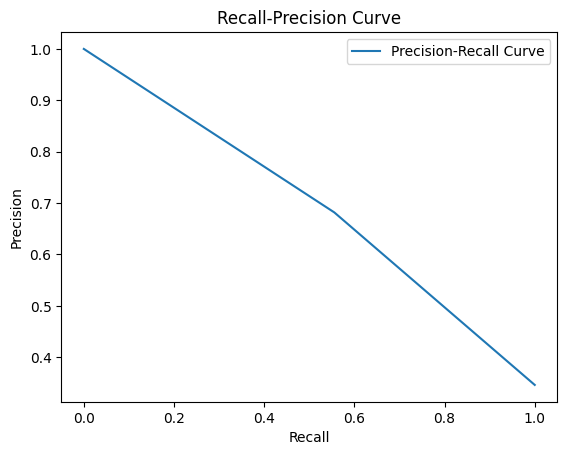

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Define features and target variable
X = standardized_data
Y = diabetes_dataset['Outcome']
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=93)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the model
model = GaussianNB()
# Fit the model on the training data
model.fit(X_train, Y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(Y_test, predictions)

# Plot the recall-precision curve
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Recall-Precision Curve')
plt.legend()
plt.show()


In [ ]:
import joblib
import numpy as np

In [ ]:
input_data = (50, 5, 1, 2, 3, 2, 1, 1000, 200, 166, 72, 19, 175, 25.8, 0.248, 1, 6.6)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
std_data = scaler.transform(input_data_reshaped)
prediction = classifier.predict(std_data)


In [ ]:
objects_to_save = {
    'scaler': scaler,
    'classifier': classifier
}


In [ ]:
joblib.dump(objects_to_save, 'diabetics.pkl')


['diabetics.pkl']

In [ ]:
loaded_objects = joblib.load('diabetics.pkl')
scaler = loaded_objects['scaler']
classifier = loaded_objects['classifier']


In [ ]:
import pickle

In [ ]:
pickle.dump(model,open('/content/model_saved','wb'))

In [ ]:
model_loaded = pickle.load(open('/content/model_saved','rb'))

In [ ]:
model_loaded.predict(X_test)

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1])

In [ ]:
import joblib

In [ ]:
joblib.dump

<function joblib.numpy_pickle.dump(value, filename, compress=0, protocol=None, cache_size=None)>

In [ ]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(Y_test, predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[44  7]
 [12 15]]


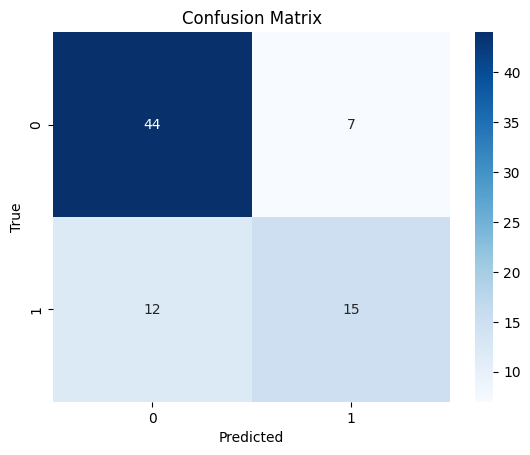

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(Y_test, predictions)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Set labels, title, and ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


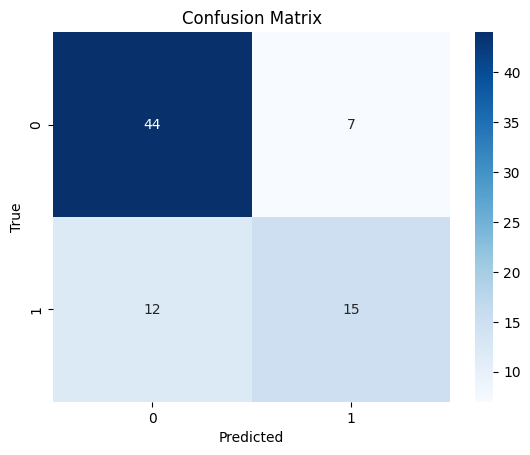

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(Y_test, predictions)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Set labels, title, and ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


[[4.96563372e+01 4.84838219e+00 9.94715972e-01 1.98466842e+00
  3.05896321e+00 1.96661281e+00 9.58804006e-01 1.00758745e+03
  2.01627127e+02 1.67673084e+02 7.18250198e+01 1.89703145e+01
  1.77899204e+02 2.55487967e+01 2.56760486e-01 9.79096738e-01
  6.48097154e+00]]
[1]
The person is diabetic and hypertensive.


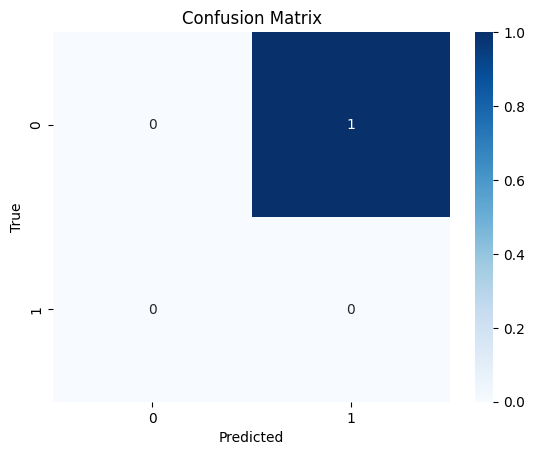

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define the input data and true label
input_data = (50, 5, 1, 2, 3, 2, 1, 1000, 200, 166, 72, 19, 175, 25.8, 0.248, 1, 6.6)
true_label = 0  # Assuming the true label is known

# Convert the input data to a NumPy array and reshape it
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

# Perform the prediction
prediction = classifier.predict(std_data)
print(prediction)

# Print the prediction result
if prediction[0] == 0:
    print('The person is not diabetic and hypertensive.')
else:
    print('The person is diabetic and hypertensive.')

# Compute the confusion matrix
cm = confusion_matrix([true_label], prediction)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Set labels, title, and ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       245
           1       0.71      0.47      0.56       145

    accuracy                           0.73       390
   macro avg       0.72      0.68      0.68       390
weighted avg       0.73      0.73      0.72       390

Accuracy: 0.7307692307692307


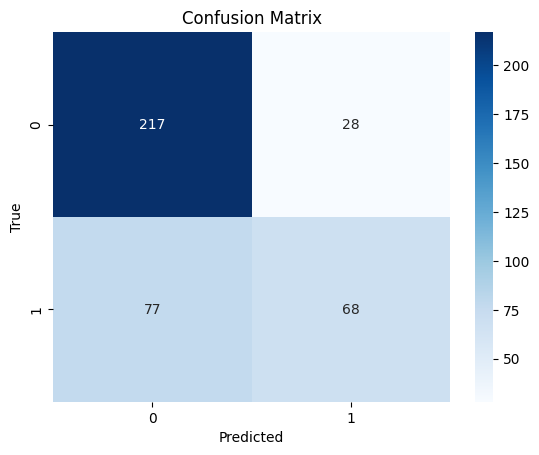

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define features and target variable
X = standardized_data
Y = diabetes_dataset['Outcome']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=70)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the model
model = SVC()

# Fit the model on the training data
model.fit(X_train, Y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(Y_test, predictions))
print("Accuracy:", accuracy_score(Y_test, predictions))

# Compute the confusion matrix
cm = confusion_matrix(Y_test, predictions)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Set labels, title, and ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.94      0.85        49
           1       0.84      0.55      0.67        29

    accuracy                           0.79        78
   macro avg       0.81      0.75      0.76        78
weighted avg       0.80      0.79      0.78        78

Accuracy: 0.7948717948717948


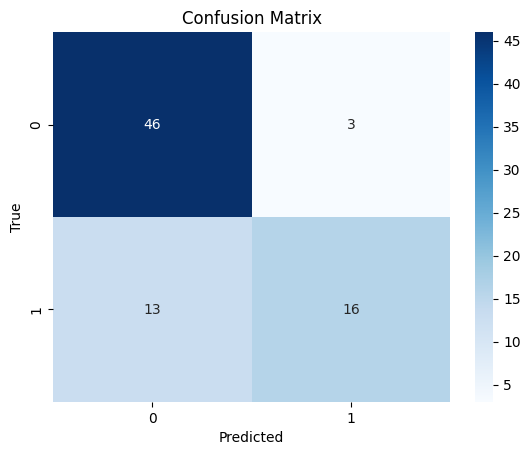

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define features and target variable
X = standardized_data
Y = diabetes_dataset['Outcome']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=70)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the model
model = AdaBoostClassifier()

# Fit the model on the training data
model.fit(X_train, Y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(Y_test, predictions))
print("Accuracy:", accuracy_score(Y_test, predictions))

# Compute the confusion matrix
cm = confusion_matrix(Y_test, predictions)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Set labels, title, and ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


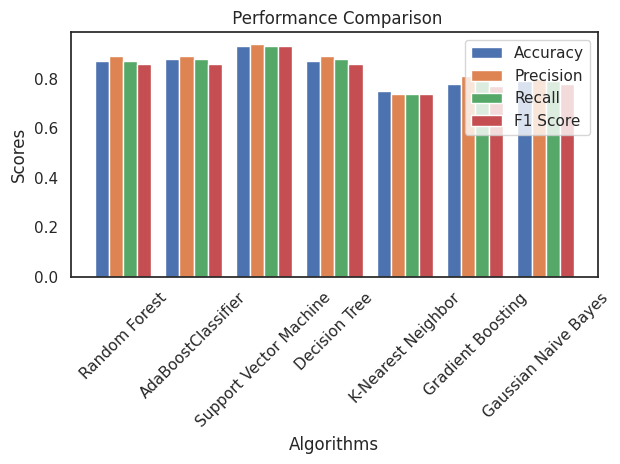

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# List of model names
model_names = ['Random Forest', 'AdaBoostClassifier', 'Support Vector Machine', 'Decision Tree', 'K-Nearest Neighbor', 'Gradient Boosting', 'Gaussian Naive Bayes']

# Evaluation metrics for each model
accuracy_scores = [0.87, 0.88, 0.93, 0.87, 0.75, 0.78, 0.79]
precision_scores = [0.89, 0.89, 0.94, 0.89, 0.74, 0.81, 0.80]
recall_scores = [0.87, 0.88, 0.93, 0.88, 0.74, 0.79, 0.79]
f1_scores = [0.86, 0.86, 0.93, 0.86, 0.74, 0.77, 0.78]

# Set the width of the bars
bar_width = 0.2

# Set the position of the bars on the x-axis
x = np.arange(len(model_names))

# Plotting the bars for accuracy scores
plt.bar(x, accuracy_scores, width=bar_width, label='Accuracy')
# Plotting the bars for precision scores
plt.bar(x + bar_width, precision_scores, width=bar_width, label='Precision')
# Plotting the bars for recall scores
plt.bar(x + 2 * bar_width, recall_scores, width=bar_width, label='Recall')
# Plotting the bars for F1 scores
plt.bar(x + 3 * bar_width, f1_scores, width=bar_width, label='F1 Score')

# Set the labels, title, and legend
plt.xlabel('Algorithms')
plt.ylabel('Scores')
plt.title(' Performance Comparison')
plt.xticks(x + 1.5 * bar_width, model_names, rotation=45)
plt.legend()

# Show the graph
plt.tight_layout()
plt.show()


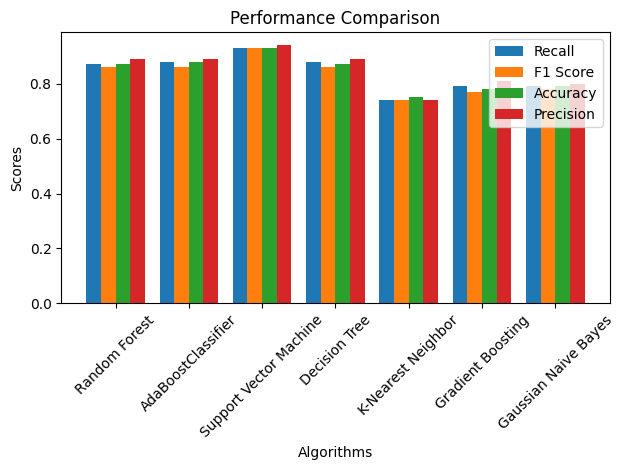

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# List of model names
model_names = ['Random Forest', 'AdaBoostClassifier', 'Support Vector Machine', 'Decision Tree', 'K-Nearest Neighbor', 'Gradient Boosting', 'Gaussian Naive Bayes']

# Evaluation metrics for each model
accuracy_scores = [0.87, 0.88, 0.93, 0.87, 0.75, 0.78, 0.79]
precision_scores = [0.89, 0.89, 0.94, 0.89, 0.74, 0.81, 0.80]
recall_scores = [0.87, 0.88, 0.93, 0.88, 0.74, 0.79, 0.79]
f1_scores = [0.86, 0.86, 0.93, 0.86, 0.74, 0.77, 0.78]

# Set the width of the bars
bar_width = 0.2

# Set the position of the bars on the x-axis
x = np.arange(len(model_names))

# Plotting the bars for recall scores
plt.bar(x, recall_scores, width=bar_width, label='Recall')
# Plotting the bars for F1 scores
plt.bar(x + bar_width, f1_scores, width=bar_width, label='F1 Score')
# Plotting the bars for accuracy scores
plt.bar(x + 2 * bar_width, accuracy_scores, width=bar_width, label='Accuracy')
# Plotting the bars for precision scores
plt.bar(x + 3 * bar_width, precision_scores, width=bar_width, label='Precision')

# Set the labels, title, and legend
plt.xlabel('Algorithms')
plt.ylabel('Scores')
plt.title('Performance Comparison')
plt.xticks(x + 1.5 * bar_width, model_names, rotation=45)
plt.legend()

# Show the graph
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

# True labels of the validation dataset
true_labels = [0, 1, 1, 0, 1, 0, 1]

# Predicted labels generated by the model
predicted_labels = [0, 1, 1, 0, 1, 0, 0]

# Calculate validation accuracy
validation_accuracy = accuracy_score(true_labels, predicted_labels)

# Print the validation accuracy
print("Validation Accuracy:", validation_accuracy)

ValueError: ignored

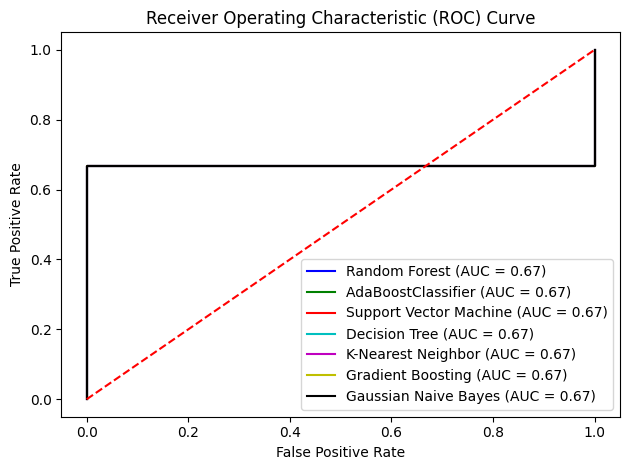

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc

# List of model names
model_names = ['Random Forest', 'AdaBoostClassifier', 'Support Vector Machine', 'Decision Tree', 'K-Nearest Neighbor', 'Gradient Boosting', 'Gaussian Naive Bayes']

# True labels of the validation dataset
true_labels = [1, 1, 1, 0, 1, 1, 1]

# Predicted probabilities for the positive class
predicted_probabilities = [0.2, 0.6, 0.8, 0.5, 0.7, 0.4, 0.9]

# Initialize lists to store false positive rate (fpr) and true positive rate (tpr)
fpr_list = []
tpr_list = []

# Calculate the ROC curve for each model
for i in range(len(model_names)):
    fpr, tpr, _ = roc_curve(true_labels, predicted_probabilities)
    fpr_list.append(fpr)
    tpr_list.append(tpr)

# Plot the ROC curve for each model
plt.figure()
colors = ['blue', 'g', 'r', 'c', 'm', 'y', 'k']
for i in range(len(model_names)):
    roc_auc = auc(fpr_list[i], tpr_list[i])
    plt.plot(fpr_list[i], tpr_list[i], color=colors[i], label=f'{model_names[i]} (AUC = {roc_auc:.2f})')

# Plot the random guess line
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

# Set the labels, title, and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show the graph
plt.tight_layout()
plt.show()
